In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("record.csv")
df

,mask_percent,mlm_acc_each_epoch,mlm_loss_each_epoch
0,15,"[[0.33180474265371385, 0.41084897121824654, 0....","[[0.07434512674808502, 0.04399368539452553, 0...."
1,14,"[[0.33285103584347253, 0.4132851035843473, 0.4...","[[0.07755900919437408, 0.08269260823726654, 0...."
2,13,"[[0.3196505339065317, 0.40840382748578563, 0.4...","[[0.08544578403234482, 0.07022812217473984, 0...."
3,12,"[[0.3215590742996346, 0.41100791717417784, 0.4...","[[0.08821828663349152, 0.044293925166130066, 0..."
4,11,"[[0.3226237169323208, 0.40231995326712844, 0.4...","[[0.07371237128973007, 0.04995165765285492, 0...."
...,...,...,...
95,10,"[[0.33623888840942434, 0.4265987744886511, 0.4...","[[0.09615031629800797, 0.06114671379327774, 0...."
96,9,"[[0.33128114922310176, 0.4187432815401153, 0.4...","[[0.07162897288799286, 0.039814889430999756, 0..."
97,8,"[[0.33292790800530736, 0.42171605484298985, 0....","[[0.05522541329264641, 0.033780016005039215, 0..."
98,7,"[[0.34385256248422114, 0.4291845493562232, 0.4...","[[0.058178603649139404, 0.027606740593910217, ..."


In [122]:
mask_range = [i for i in range(15, 5, -1)]

In [123]:
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print((mlm_acc))

[[0.32516507193254024, 0.4055048909726858, 0.42304486313315365, 0.4380324630250513, 0.4548662109927847, 0.466912021856113, 0.4921031270953794, 0.5089182050335017, 0.5193913514906938, 0.5371384635169465], [0.33135723752703605, 0.41130744517219214, 0.4287577954091196, 0.4429760768565528, 0.4590460106887789, 0.469272569511246, 0.48813282414827136, 0.5076192012233649, 0.5231939409106932, 0.543466420959332], [0.32750380389293204, 0.40930315955878305, 0.42940455026066626, 0.4443467956035504, 0.46306716142154275, 0.4731992166737503, 0.4889602516867938, 0.5053489894078347, 0.5237590610179331, 0.5352318086556407], [0.3314626735794657, 0.41504018959402256, 0.43678946765742815, 0.44824115666463105, 0.4657826442411923, 0.47963874194998385, 0.48938507866942044, 0.5071021021535487, 0.5234661042620765, 0.5486214299939352], [0.3363109480998942, 0.4208512547880372, 0.4425506490196618, 0.45092486886087013, 0.4709812823097318, 0.48900936522067884, 0.5088919555324115, 0.5279138168999776, 0.541470846967935

In [124]:
a = np.array(mlm_acc)
print(a.T)
a = np.sort(a.T)
print(a)

[[0.32516507 0.33135724 0.3275038  0.33146267 0.33631095 0.33620456
  0.33582959 0.33474825 0.34009329 0.33617394]
 [0.40550489 0.41130745 0.40930316 0.41504019 0.42085125 0.4197573
  0.42182255 0.42067231 0.42603925 0.4246543 ]
 [0.42304486 0.4287578  0.42940455 0.43678947 0.44255065 0.43780412
  0.44287239 0.4442227  0.45185073 0.45003511]
 [0.43803246 0.44297608 0.4443468  0.44824116 0.45092487 0.45669731
  0.45823897 0.46066876 0.468117   0.47175841]
 [0.45486621 0.45904601 0.46306716 0.46578264 0.47098128 0.47228775
  0.47484959 0.47959659 0.48111969 0.48581114]
 [0.46691202 0.46927257 0.47319922 0.47963874 0.48900937 0.48429867
  0.49117439 0.49710783 0.49963611 0.5009914 ]
 [0.49210313 0.48813282 0.48896025 0.48938508 0.50889196 0.50097389
  0.50882422 0.50737301 0.51897245 0.51309598]
 [0.50891821 0.5076192  0.50534899 0.5071021  0.52791382 0.51537925
  0.51945414 0.51985181 0.52989413 0.53010294]
 [0.51939135 0.52319394 0.52375906 0.5234661  0.54147085 0.53662612
  0.53351926 

In [125]:
for i in a:
    print(i[7])

0.3362045610504866
0.42182255318410605
0.4442227028538623
0.46066876369463705
0.4795965866447374
0.49710783243149104
0.5088919555324115
0.5279138168999776
0.5426743626098881
0.556656507780569


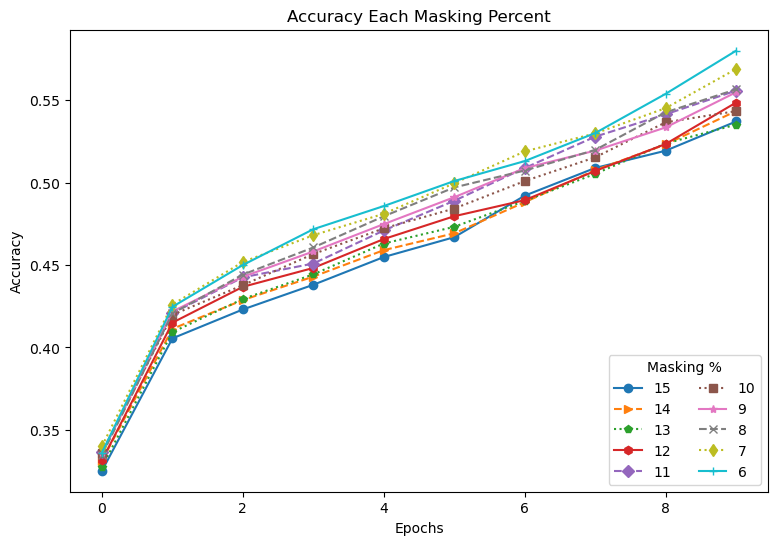

In [126]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
for i in range(10):
    plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

In [127]:
max_acc_each_epoch = np.max(np.array(mlm_acc), axis=0)
max_acc_each_epoch

array([0.34009329, 0.42603925, 0.45185073, 0.47175841, 0.48581114,
       0.5009914 , 0.51897245, 0.53010294, 0.55390329, 0.58008685])

In [128]:
epochs = [i for i in range(10)]
mlm_loss = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][2][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_loss.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print(mlm_loss)

[[0.07943079769611358, 0.0467265922576189, 0.05762047506868839, 0.05535939037799835, 0.07000594511628151, 0.04798183143138886, 0.0469473322853446, 0.04609926138073206, 0.037388942390680316, 0.03583210576325655], [0.08445140384137631, 0.06642071828246117, 0.06002142243087292, 0.05118043217808008, 0.038250391557812694, 0.040658799558877946, 0.03589421696960926, 0.03534808177500963, 0.03775928597897291, 0.03815551865845919], [0.07391945794224739, 0.059580006077885626, 0.052399047464132306, 0.0519030686467886, 0.04992036893963814, 0.04674284365028143, 0.042494837753474714, 0.03530698181129992, 0.033599854446947575, 0.04164119865745306], [0.06758581399917603, 0.05038014240562916, 0.04827739354223013, 0.04280511736869812, 0.041996344923973083, 0.03575033936649561, 0.0349397674202919, 0.03487020693719387, 0.03794750701636076, 0.027186793461441993], [0.06601625457406043, 0.036837028339505196, 0.0391069995239377, 0.034129750169813636, 0.04133978821337223, 0.03234166903421283, 0.0313093952834606

<function matplotlib.pyplot.show(close=None, block=None)>

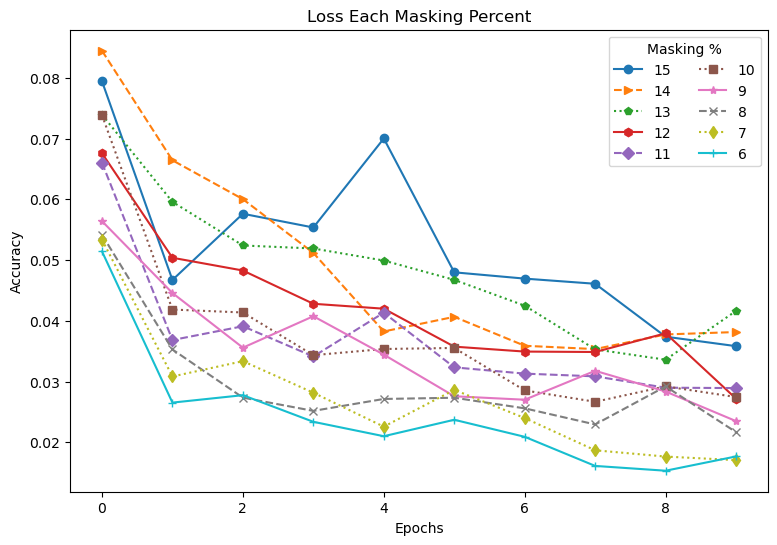

In [129]:
plt.title("Loss Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
for i in range(10):
    plt.plot(epochs, mlm_loss[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, title = "Masking %", ncol = 2) 
plt.show

# ------------------------------------------

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv("record.csv")
df = df[50:]

In [132]:
mask_range = [i for i in range(15, 5, -1)]

In [133]:
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print((mlm_acc))

[[0.326620631638197, 0.4054389024787346, 0.4261520628498765, 0.4432320013414869, 0.459924871934995, 0.47256468359656284, 0.4977758105431998, 0.5153684983291924, 0.532324708534955, 0.5577905039896806], [0.33580069867280365, 0.41382647196589895, 0.4325218594787506, 0.4478962534871808, 0.4635342795833079, 0.47271723419267797, 0.4966147295673318, 0.5094922126171758, 0.5253820986270155, 0.5371197486279204], [0.32722595647743363, 0.4111497276038355, 0.42795465980411046, 0.4445132826668182, 0.46318463047982555, 0.4721122255158968, 0.49209518500525584, 0.5064254145750338, 0.5261943115750263, 0.5409949183470457], [0.33480889279107223, 0.420467022353712, 0.44254648263928953, 0.45253323894302255, 0.46812274293389733, 0.48383048249223437, 0.4885323798155075, 0.500527354861075, 0.5283380739605994, 0.5545531169852472], [0.34246950132637977, 0.426633390260017, 0.4457732406273654, 0.45117443027576376, 0.47479609729458633, 0.4976195480269955, 0.510692288450074, 0.5329752853333296, 0.5425360986656624, 0

In [134]:
a = np.array(mlm_acc)
a = np.sort(a.T)
print(a)

[[0.32662063 0.32722596 0.33480889 0.3358007  0.33808075 0.3382518
  0.33968408 0.34081459 0.34228702 0.3424695 ]
 [0.4054389  0.41114973 0.41382647 0.42046702 0.42394541 0.42433842
  0.42465361 0.42663339 0.42980292 0.43029897]
 [0.42615206 0.42795466 0.43252186 0.44228703 0.44254648 0.44577324
  0.44682305 0.44692194 0.45401332 0.45474547]
 [0.443232   0.44451328 0.44789625 0.45117443 0.45253324 0.46010391
  0.46136018 0.46485066 0.46794355 0.4786464 ]
 [0.45992487 0.46318463 0.46353428 0.46812274 0.47289579 0.4747961
  0.47613573 0.48130546 0.48333539 0.48753027]
 [0.47211223 0.47256468 0.47271723 0.48383048 0.48817193 0.49560244
  0.49761955 0.50130215 0.50649587 0.50717511]
 [0.48853238 0.49209519 0.49661473 0.49777581 0.50202697 0.50709058
  0.51069229 0.51550239 0.51580637 0.53042167]
 [0.50052735 0.50642541 0.50949221 0.5153685  0.5169277  0.52364022
  0.52527804 0.52727825 0.53280764 0.53297529]
 [0.5253821  0.52619431 0.52833807 0.53232471 0.53789426 0.53863872
  0.5425361  0

In [135]:
total_acc_mean = np.mean(a, axis=1)
total_acc_mean

array([0.33660439, 0.42105548, 0.44197391, 0.45722539, 0.47307653,
       0.48975917, 0.50565584, 0.51907206, 0.5381032 , 0.55585695])

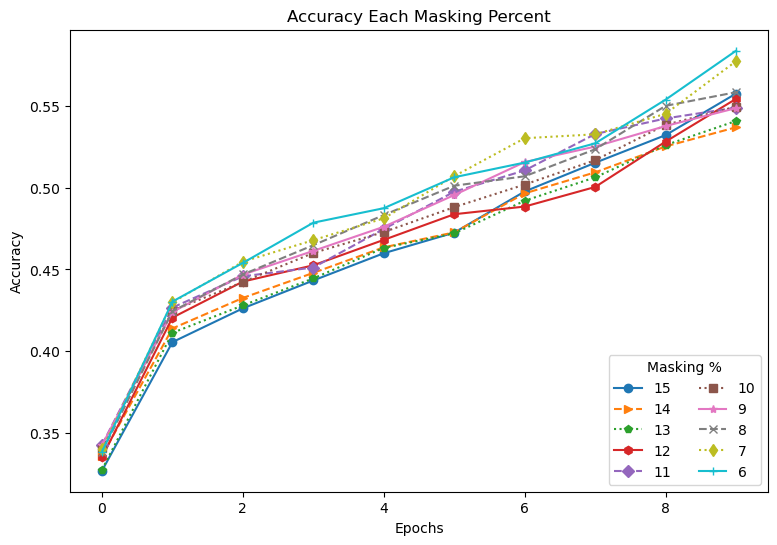

In [136]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
for i in range(10):
    plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

# -------------------------------------------

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [138]:
df = pd.read_csv("record.csv")
df = df[50:]

In [139]:
mask_range = [i for i in range(15, 5, -1)]
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())

In [140]:
df_growMask = pd.read_csv("record_mask_grow.csv")
df_growMask

,mlm_acc_each_epoch,mlm_loss_each_epoch,Mask_Percent_each_epoch
0,"[0.3263961670908819, 0.41212031849012093, 0.40...","[0.05393897742033005, 0.03476668894290924, 0.0...","[6, 6, 6, 9, 9, 9, 12, 12, 12, 15]"
1,"[0.3401309913664781, 0.41544965411222134, 0.43...","[0.04206446558237076, 0.02424311265349388, 0.0...","[6, 7, 7, 7, 10, 10, 10, 13, 13, 13]"
2,"[0.3401442307692308, 0.4101596881679869, 0.422...","[0.07702439278364182, 0.036117106676101685, 0....","[6, 7, 7, 7, 10, 10, 10, 13, 13, 13]"
3,"[0.3198507462686567, 0.41226401287867703, 0.42...","[0.027235671877861023, 0.017733361572027206, 0...","[6, 6, 6, 9, 9, 9, 12, 12, 12, 15]"
4,"[0.3481371087928465, 0.41497559722578986, 0.41...","[0.043872278183698654, 0.027666334062814713, 0...","[6, 7, 7, 7, 10, 10, 10, 13, 13, 13]"
5,"[0.3308900523560209, 0.4085171490501084, 0.407...","[0.0463947169482708, 0.03666337579488754, 0.04...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"


In [141]:
epochs = [i for i in range(10)]
dy_mlm_acc = []
for i in range(5):
    dy_mlm_acc.append(df_growMask.iloc[i][0][2:-2].split(','))
    for j in range(len(dy_mlm_acc[-1])):
        dy_mlm_acc[-1][j] = float(dy_mlm_acc[-1][j])
dy_mlm_acc = np.mean(np.array(dy_mlm_acc), axis=0).tolist()
print((dy_mlm_acc))

[0.33493184885761884, 0.4129938541749592, 0.41948208700533307, 0.43187701998386824, 0.4252939527667336, 0.4256486167938303, 0.4242533248392264, 0.4137241793461951, 0.4192737678150292, 0.4159234760620033]


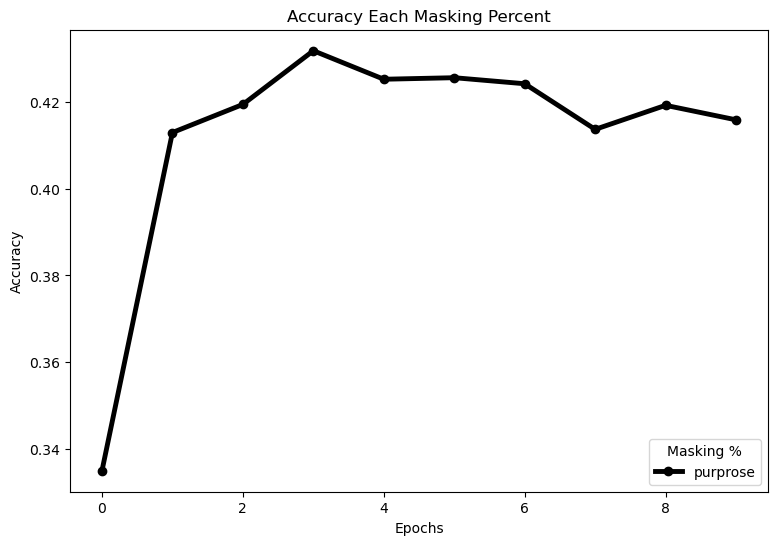

In [142]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
# for i in range(10):
#     plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])
plt.plot(epochs, dy_mlm_acc, linestyle="solid", marker="o", linewidth=3.5, color='black')

plt.legend(["purprose"], loc ="lower right", title = "Masking %", ncol = 3) 
plt.show()

# ------------------------------------------------

In [246]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [251]:
df_fine_tuned = pd.read_csv("fine_tune_record.csv")
df_fine_tuned = df_fine_tuned[6:14]
df_fine_tuned

,model_name,train_acc,train_loss,val_acc,val_loss
6,mask_dyn10,"[0.2539325842696629, 0.4387640449438202, 0.664...","[0.2730964511298062, 0.23065802016285028, 0.18...","[0.3738738738738739, 0.49099099099099097, 0.80...","[0.2424302095765466, 0.21469988103385443, 0.15..."
7,mask15,"[0.22303370786516855, 0.32471910112359553, 0.4...","[0.272635457890757, 0.2551756019672651, 0.2270...","[0.28378378378378377, 0.38738738738738737, 0.5...","[0.2660051745337409, 0.24461251013987773, 0.22..."
8,mask6,"[0.2095505617977528, 0.33370786516853934, 0.53...","[0.27415289162250045, 0.25134556172938827, 0.2...","[0.24774774774774774, 0.3963963963963964, 0.59...","[0.26416432427930403, 0.23533862802359434, 0.1..."
9,mask_dyn_grow1,"[0.22303370786516855, 0.32303370786516855, 0.5...","[0.2695490490184741, 0.2591027762782708, 0.212...","[0.27927927927927926, 0.38288288288288286, 0.6...","[0.263116865007727, 0.2470604712898667, 0.1747..."
10,mask_dyn10,"[0.25842696629213485, 0.42303370786516853, 0.6...","[0.2658821882156844, 0.24109506161695116, 0.17...","[0.34684684684684686, 0.5180180180180181, 0.79...","[0.2531453129407522, 0.2142815415386681, 0.146..."
11,mask15,"[0.27303370786516856, 0.4044943820224719, 0.49...","[0.2656954995701822, 0.2480341367507249, 0.227...","[0.3963963963963964, 0.4594594594594595, 0.581...","[0.2535164340122326, 0.23525637066042102, 0.21..."
12,mask6,"[0.21797752808988763, 0.300561797752809, 0.382...","[0.28303287571735597, 0.2640440569499905, 0.24...","[0.24774774774774774, 0.3063063063063063, 0.45...","[0.2711516054900917, 0.25653956172702547, 0.23..."
13,mask_dyn_grow1,"[0.2556179775280899, 0.3398876404494382, 0.510...","[0.2688382394528121, 0.2536936859401424, 0.219...","[0.2927927927927928, 0.40540540540540543, 0.64...","[0.26508120856843553, 0.2402962693223008, 0.18..."


In [252]:
train_acc = []
model_name = []
for i in range(4):
    cur_model = df_fine_tuned[df_fine_tuned["model_name"] == df_fine_tuned.iloc[i][0]]
    acc_this_model = []
    for j in range(len(cur_model)):
        acc_this_model.append(cur_model.iloc[j][1][2:-2].split(','))
        for k in range(len(acc_this_model[-1])):
            acc_this_model[-1][k] = float(acc_this_model[-1][k])
    train_acc.append(np.mean(np.array(acc_this_model), axis=0).tolist())

In [253]:
print(train_acc)

[[0.25617977528089886, 0.43089887640449437, 0.6758426966292135, 0.8530898876404495, 0.9570224719101124, 0.9713483146067416, 0.9797752808988764, 0.9873595505617975], [0.24803370786516854, 0.36460674157303374, 0.48567415730337077, 0.6070224719101124, 0.7117977528089887, 0.7938202247191011, 0.8466292134831461, 0.881741573033707], [0.21376404494382023, 0.31713483146067417, 0.4561797752808989, 0.6376404494382022, 0.827808988764045, 0.9230337078651685, 0.9595505617977529, 0.9783707865168535], [0.2393258426966292, 0.3314606741573034, 0.526685393258427, 0.7429775280898876, 0.8589887640449438, 0.9345505617977528, 0.9769662921348314, 0.9867977528089885]]


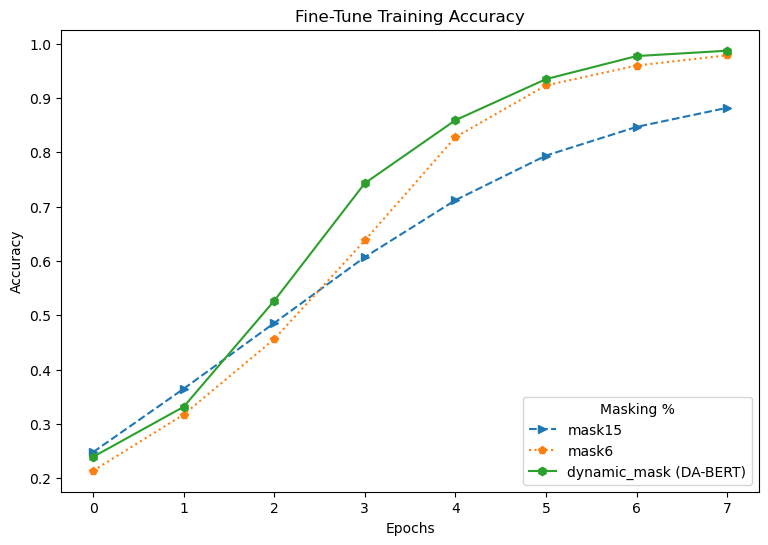

In [256]:
plt.title("Fine-Tune Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
model_name = ["purpose", "mask15", "mask6", "dynamic_mask (DA-BERT)"]
epochs = [i for i in range(8)]
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
#plt.plot(epochs, train_acc[0], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
for i in range(1, len(model_name)):
    plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(model_name[1:], loc ="lower right", title = "Masking %", ncol = 1)
plt.show()